In [18]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

In [20]:
gujarati = "http://www.econometrics.com/comdata/gujarati/data_8.3.shd"
dados = pd.read_fwf(
    gujarati,
    header=None,
    widths=[8,5,7],
    names=["pib", "trabalho", "capital"]
)
dados.index = pd.date_range(
    "1955", 
    freq="Y", 
    periods=len(dados)
).strftime("%y")
for coluna in dados: dados[coluna] = dados[coluna].astype("float")

In [21]:
modelo = smf.ols("np.log(pib) ~ np.log(trabalho) + np.log(capital)", dados).fit()

In [22]:
open("tabela.tex","w+").write(modelo.summary().as_latex())

2129

3395

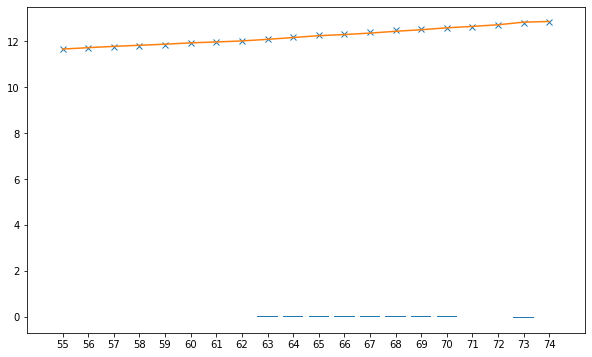

In [23]:
plt.figure(figsize=[10,6])
plt.plot(np.log(dados.pib), linewidth=0, marker="x")
plt.plot(modelo.predict())
plt.bar(height=modelo.resid, x=dados.index)
open("grafico.tex", "w+").write(
    tikzplotlib.get_tikz_code(
        axis_width="15cm",
        axis_height="5cm"
    )
)